In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from Score import ScoreClass
from DataFuncs import DataFuncs
from PlotFunctions import PlotFuncs
sns.set(style="darkgrid", rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings("ignore")

# Enable interactive notebook

In [12]:
%matplotlib notebook

# Main


Load Experiment data. 

In [13]:
DataFuncsObj = DataFuncs()
all_tag_measurements = pd.read_pickle(r'tag_measurements_2020_03_28.pkl')
all_tag_measurements = all_tag_measurements.dropna(how='any').reset_index(drop=True)

# Plots without windowing

In [ ]:
# pd.unique(all_tag_measurements.obstacle)
obstacle = 'No Obstacle'
show_measurements = all_tag_measurements.where(all_tag_measurements.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " - All setups")
# plt.figure()
# ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"] ).set_title(obstacle + " - All setups")

boxolot for each setup

In [ ]:
# pd.unique(show_measurements.setup)
for setup in pd.unique(show_measurements.setup):
    setup_measurements = show_measurements.where(show_measurements.setup == setup)
    title_str = str(obstacle) + " - " + str(setup)
    plt.figure()
#     color by display name
#     sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"], hue =setup_measurements["DisplayName"]) .set_title(title_str)
#     all devices united
    sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"]) .set_title(title_str)
    plt.show()

# Plot window data

In [36]:
win_size_seconds = 90

Choose data to plot

In [37]:
# choose all data
plot_tag_data = all_tag_measurements

In [ ]:
# exclude specific display names
plot_tag_data = DataFuncsObj.exclude_display_name_from_df(all_tag_measurements,'GalaxyNote4_AZer')

In [38]:
#normalized data 
norm_distance = 1 #m
setup = 'Phone in hand'
plot_tag_data = DataFuncsObj.normalize_by_distance(all_tag_measurements,norm_distance, setup )

GalaxyS7_YDanan:There is no 1m distance, Therefore we use 1.125m to normalize
RedmiNote8_OAvitan:There is no 1m distance, Therefore we use 0.5m to normalize


In [39]:
PlotFuncsObj = PlotFuncs(plot_tag_data, win_size_seconds)

Plot move mean

<IPython.core.display.Javascript object>


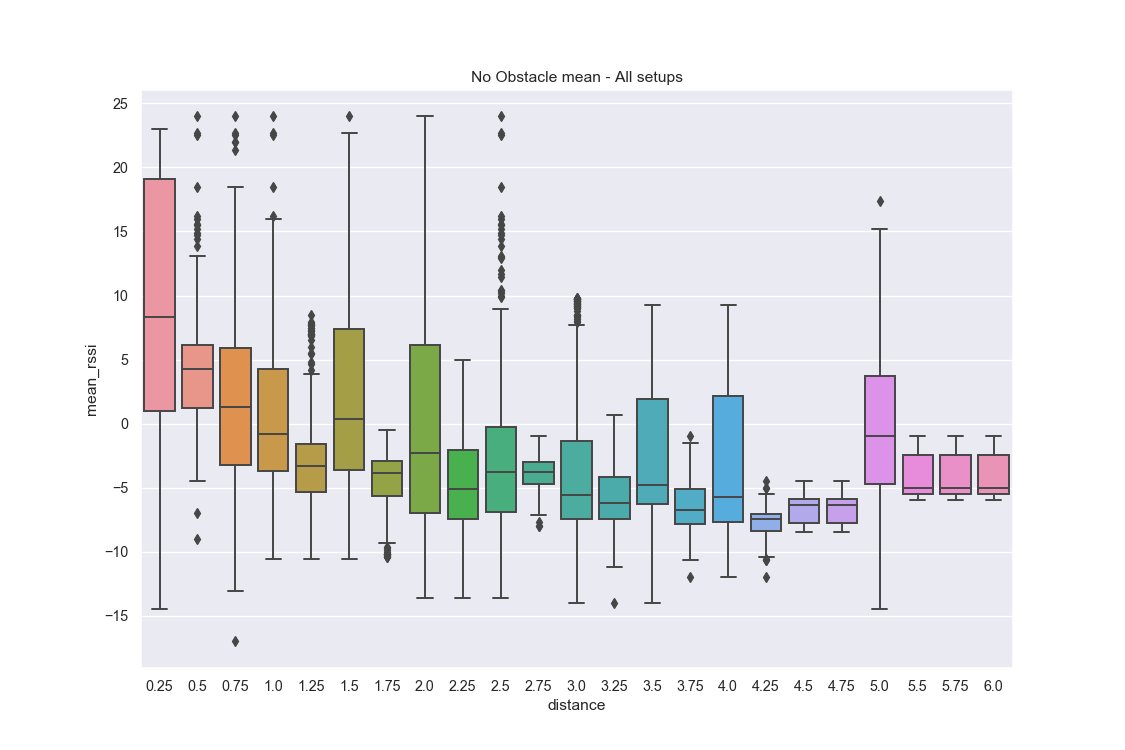

In [40]:
# PlotFuncsObj.set_minor_axes_size(1)
PlotFuncsObj.plot_data( 'mean', plot_func='boxplot',obstacle='No Obstacle', plot_hue=0)
fig1 = plt.gcf()
# PlotFuncsObj.set_minor_axes_size(5)
# fig1.savefig("mean_rssi.png")

In [34]:
PlotFuncsObj.plot_data( 'mean', plot_func='violinplot',obstacle='No Obstacle')
fig1 = plt.gcf()
# fig1.savefig("mean_rssi_violinplot.png")

Plot move median

<IPython.core.display.Javascript object>


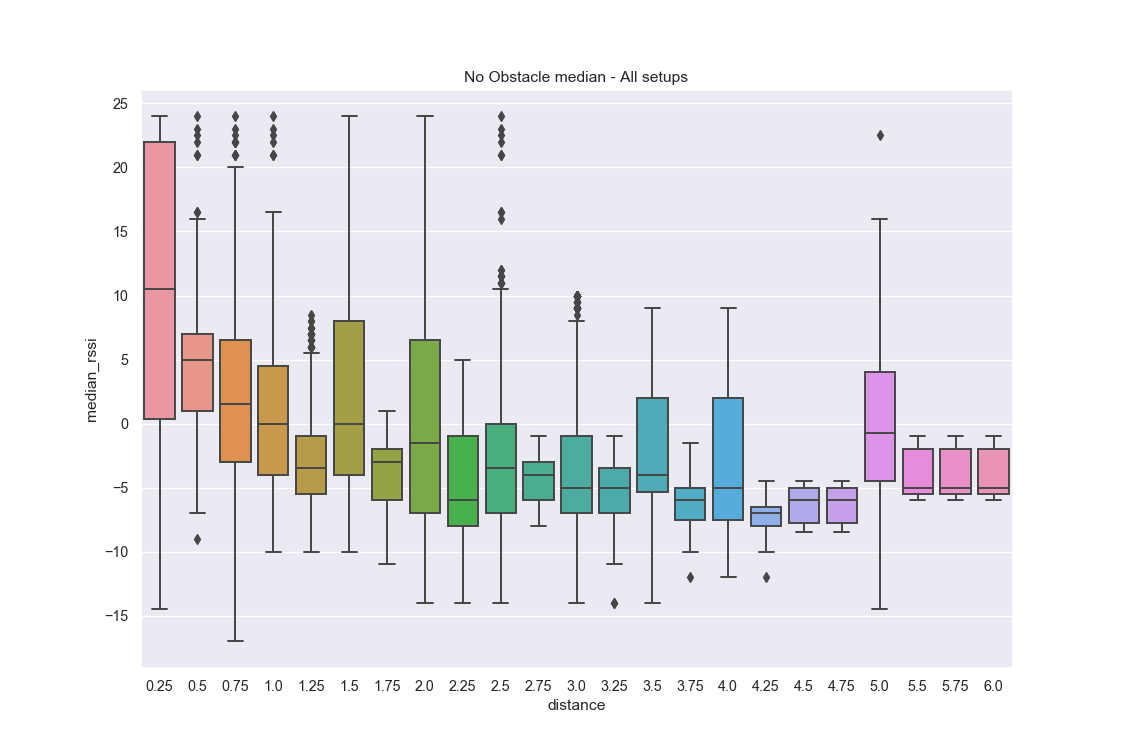

In [46]:
PlotFuncsObj.plot_data( 'median', plot_func='boxplot',obstacle='No Obstacle', plot_hue=0)
fig1 = plt.gcf()
fig1.savefig("median_rssi.png")

<IPython.core.display.Javascript object>


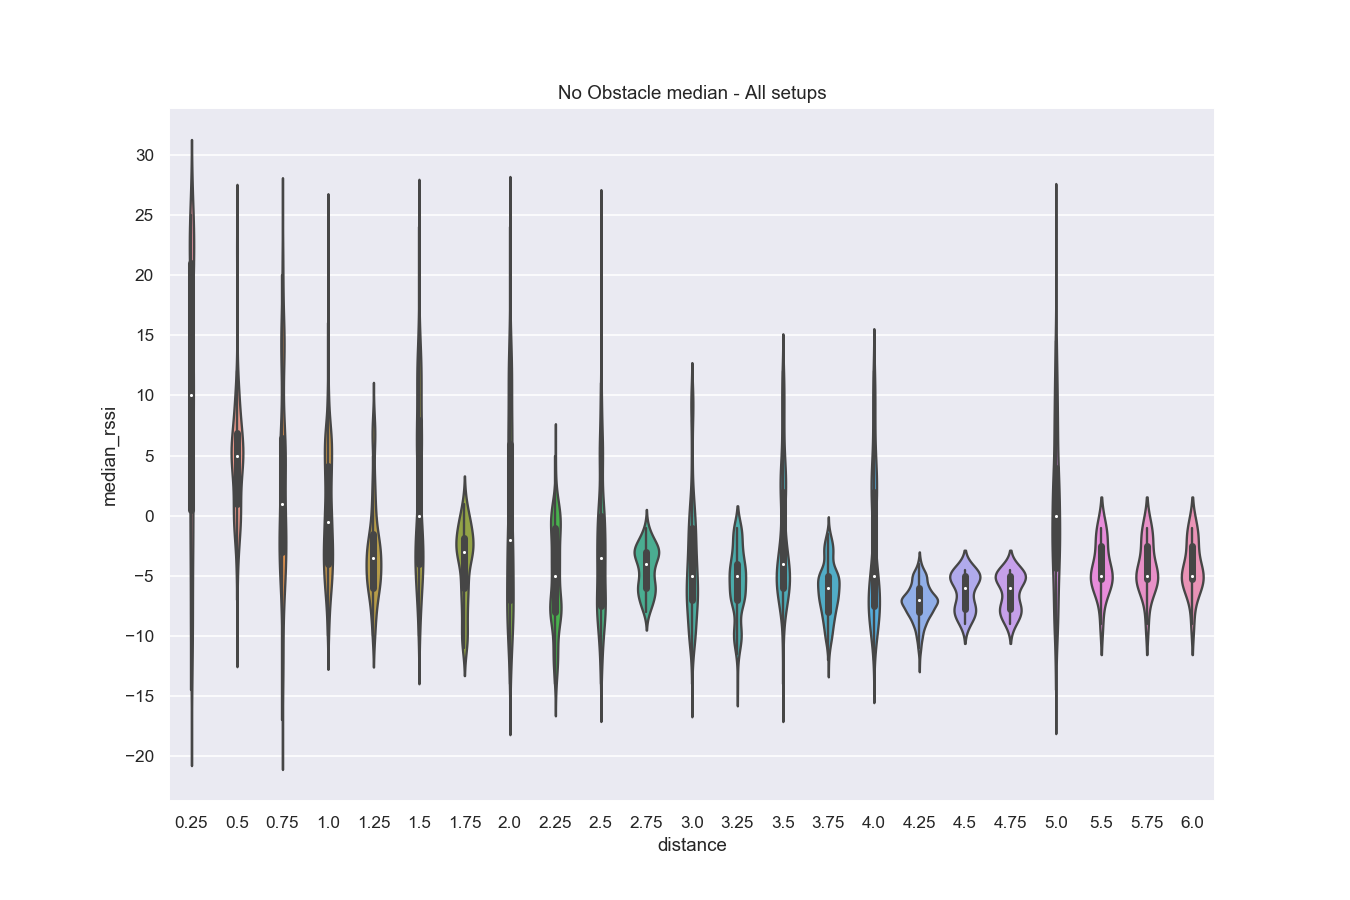

In [19]:
PlotFuncsObj.plot_data( 'median', plot_func='violinplot',obstacle='No Obstacle')
fig1 = plt.gcf()
fig1.savefig("median_rssi_violinplot.png")

Plot move variance

In [ ]:
PlotFuncsObj.plot_data( 'var', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("var_rssi.png")

Plot counts

In [ ]:
PlotFuncsObj.plot_data('count', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("count_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'count', plot_func='violinplot',obstacle='No Obstacle', plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("count_rssi_violinplot.png")

Plot wanted percentile 

In [47]:
wanted_percentile = 90

In [ ]:
# PlotFuncsObj.set_minor_axes_size(1)
PlotFuncsObj.plot_data( 'percentile', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("percentile_"+str(wanted_percentile) +"_rssi.png")

<IPython.core.display.Javascript object>

In [49]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'percentile', plot_func='violinplot',obstacle='No Obstacle',percent=wanted_percentile,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("percentile_"+str(wanted_percentile) +"_rssi_violinplot.png")

<IPython.core.display.Javascript object>

Plot above percentile

In [ ]:
wanted_percentile = 70

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile, margin = 0,plot_hue=1)
fig1 = plt.gcf()
# fig1.figure.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='violinplot',obstacle='No Obstacle',percent=wanted_percentile, margin = 0,plot_hue=0)
fig1 = plt.gcf()
# fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi_violinplot.png")

Plot counts above percentile

In [ ]:
wanted_percentile = 85
margin = 1  

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile_counts', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile, margin = margin,plot_hue=1)
fig1 = plt.gcf()
# fig1.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

# Scores

Normalized

window = 60s; distance - 1.5m ; mean rssi > -7dB 

In [35]:
score_obj = ScoreClass(plot_tag_data, 60, 'mean', 1.5, -7)
score_obj.get_all_scores()

,score
All,15290.000000
TP,4740.000000
MD (FP),2393.000000
MD/P (FP/P),0.335483
FA (FN),3613.000000
FA/N (FN/N),0.442932
RECALL (TPR),0.664517
TNR,0.557068
PRECISION (PPV),0.567461
ACCURACY,0.607194


window = 60s; distance - 3m ; mean rssi > -8dB 

In [8]:
score_obj = ScoreClass(plot_tag_data, 60, 'mean', 3, -8)
score_obj.get_all_scores()

,score
All,15290.000000
TP,7658.000000
MD (FP),4046.000000
MD/P (FP/P),0.345694
FA (FN),2384.000000
FA/N (FN/N),0.664808
RECALL (TPR),0.654306
TNR,0.335192
PRECISION (PPV),0.762597
ACCURACY,0.579464


window = 60s; distance - 3.5m ; percentile 90 > -5dB 

In [9]:
score_obj = ScoreClass(plot_tag_data, 60, 'percentile', 3.5, -5, percent = 90)
score_obj.get_all_scores()

,score
All,15290.000000
TP,8524.000000
MD (FP),3991.000000
MD/P (FP/P),0.318897
FA (FN),1816.000000
FA/N (FN/N),0.654414
RECALL (TPR),0.681103
TNR,0.345586
PRECISION (PPV),0.824371
ACCURACY,0.620209


window = 60s; distance - 2.5m ; percentile 90 > -3dB 

In [10]:
score_obj = ScoreClass(plot_tag_data, 60, 'percentile', 2.5, -3, percent = 90)
score_obj.get_all_scores()

,score
All,15290.000000
TP,6570.000000
MD (FP),3824.000000
MD/P (FP/P),0.367905
FA (FN),2463.000000
FA/N (FN/N),0.503064
RECALL (TPR),0.632095
TNR,0.496936
PRECISION (PPV),0.727333
ACCURACY,0.588816


window = 30s; distance - 3.5m ; median > -7dB 

In [26]:
score_obj = ScoreClass(plot_tag_data, 30, 'median', 3.5, -7)
score_obj.get_all_scores()

,score
All,15290.000000
TP,7782.000000
MD (FP),4733.000000
MD/P (FP/P),0.378186
FA (FN),1617.000000
FA/N (FN/N),0.582703
RECALL (TPR),0.621814
TNR,0.417297
PRECISION (PPV),0.827960
ACCURACY,0.584696


window = 30s; distance - 1.75m ; median > -6dB 

In [25]:
score_obj = ScoreClass(plot_tag_data, 30, 'median', 1.75, -6)
score_obj.get_all_scores()

,score
All,15290.000000
TP,4770.000000
MD (FP),2363.000000
MD/P (FP/P),0.331277
FA (FN),3979.000000
FA/N (FN/N),0.487802
RECALL (TPR),0.668723
TNR,0.512198
PRECISION (PPV),0.545205
ACCURACY,0.585219


window = 90s; distance - 1.75m ; mean > -6dB 

In [42]:
score_obj = ScoreClass(plot_tag_data, 90, 'mean', 1.75, -6)
score_obj.get_all_scores()

,score
All,15290.000000
TP,4781.000000
MD (FP),2352.000000
MD/P (FP/P),0.329735
FA (FN),3586.000000
FA/N (FN/N),0.439622
RECALL (TPR),0.670265
TNR,0.560378
PRECISION (PPV),0.571411
ACCURACY,0.611642


window = 90s; distance - 1.5m ; mean > -3dB 

In [45]:
score_obj = ScoreClass(plot_tag_data, 90, 'mean', 1.5, -4)
score_obj.get_all_scores()

,score
All,15290.000000
TP,4121.000000
MD (FP),2577.000000
MD/P (FP/P),0.384742
FA (FN),2763.000000
FA/N (FN/N),0.321578
RECALL (TPR),0.615258
TNR,0.678422
PRECISION (PPV),0.598635
ACCURACY,0.650752


# Are the two devices in the same room?


In [ ]:
measurements_same_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'No Obstacle')
measurements_same_room = measurements_same_room.dropna(how='any').reset_index(drop=True)

measurements_other_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'Obstacle: wall')
measurements_other_room = measurements_other_room.dropna(how='any').reset_index(drop=True)

sns.boxplot(x=all_tag_measurements["obstacle"], y=all_tag_measurements["rssi"], hue =all_tag_measurements["DisplayName"]).set_title('All distances')